In [36]:
import pandas as pd 
import numpy as  np 
import seaborn as sns
import os 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

os.chdir("../dataFrames")
df = pd.read_csv('finalView.csv',  index_col=0)
blueStats = pd.read_csv('blueStats.csv', index_col = 0 )
redStats = pd.read_csv('redStats.csv', index_col = 0)
blue = pd.read_csv("blue.csv")
red = pd.read_csv("red.csv")
women = pd.read_csv("womenView.csv")
from sklearn.neighbors import NearestNeighbors


In [37]:
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
0.0,Henry Cejudo,Marlon Moraes,Marc Goddard,6/8/19,"Chicago, Illinois, USA",Red,True,Bantamweight,5.0,0.0,...,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,1.0
0.0,Henry Cejudo,Marlon Moraes,Marc Goddard,6/8/19,"Chicago, Illinois, USA",Red,True,Bantamweight,5.0,0.0,...,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,1.0
2.0,Tony Ferguson,Donald Cerrone,Dan Miragliotta,6/8/19,"Chicago, Illinois, USA",Red,False,Lightweight,3.0,0.0,...,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0,1.0
3.0,Jimmie Rivera,Petr Yan,Kevin MacDonald,6/8/19,"Chicago, Illinois, USA",Blue,False,Bantamweight,3.0,0.0,...,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0,1.0
4.0,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,6/8/19,"Chicago, Illinois, USA",Blue,False,Heavyweight,3.0,0.0,...,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0,1.0


# Implementing Algorithm

In [38]:
def get_recommends(fighter, stats):
    stats_rindex = stats.reset_index(drop=True)
    newView_rindex = df.reset_index(drop=True)
    dist, fighter_indices = knn.kneighbors(stats_rindex)
    fighters = fighter_indices[newView_rindex.loc[newView_rindex['B_fighter'] == fighter].index].tolist()[0]
    fighters_as_df = newView_rindex[newView_rindex.index.isin(fighters)]
    fighters_as_df = fighters_as_df[fighters_as_df['B_fighter'] != fighter]
    return fighters_as_df


In [39]:
#for the blueStats 
knn = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors=5)
knn.fit(blueStats)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [40]:
dist, fighter_indices = knn.kneighbors(blueStats)
fighter_indices[40]

array([  40,  204, 1136, 1355, 1256])

In [41]:
#Find Recommendations for Amanda Nunes

In [42]:
valentinaRecommendations = get_recommends("Valentina Shevchenko", blueStats)
valentinaRecommendations

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
835,Kiichi Kunimoto,Luiz Dutra,John Sharp,1/4/14,"Singapore, Singapore",Red,False,Welterweight,3.0,0.0,...,0.0,0.0,0.0,Orthodox,177.80,180.34,170.0,31.0,32.0,1.0
1063,Mark Hunt,Chris Tuchscherer,John Sharp,2/26/11,"Sydney, New South Wales, Australia",Red,False,Heavyweight,3.0,1.0,...,0.0,0.0,0.0,Orthodox,177.80,182.88,265.0,35.0,36.0,1.0
1572,Luana Carolina,Priscila Cachoeira,Fernando Portella,5/11/19,"Rio de Janeiro, Rio de Janeiro, Brazil",Red,False,Women's Flyweight,3.0,2.0,...,0.0,0.0,0.0,Orthodox,167.64,175.26,125.0,30.0,25.0,0.0
1628,Kailin Curran,Alexandra Albu,Herb Dean,7/29/17,"Anaheim, California, USA",Blue,False,Women's Strawweight,3.0,0.0,...,1.0,0.0,1.0,Orthodox,162.56,165.10,115.0,27.0,26.0,0.0


In [43]:
#Finding Recommendations for Amanda Nunes based on Gender 

In [44]:
#shows all the Male Fighters most similar to Amanda Nunes
maleRecs = valentinaRecommendations.loc[(nunesRecommendations['Gender'] == 1)]
maleRecs

NameError: name 'nunesRecommendations' is not defined

In [45]:
#shows all the Female Fighters more similar to Amanda Nunes
femaleRecs = valentinaRecommendations.loc[(nunesRecommendations['Gender'] == 0)]
femaleRecs

NameError: name 'nunesRecommendations' is not defined

### KNN Performance-For blue fighters. Can also be done for Red fighters
###### NOTE: There are two performance values.  The graph returns 0.41 and the function returns 0.95 . Its likely the value from the function is right. Not sure. You can check this link
https://www.kaggle.com/calmdownkarm/ufc-predictor-and-notes

In [166]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df3 = pd.read_csv('blueStats.csv',  index_col=0)

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
   
    
def run_all_and_Plot(df3):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = np.asarray(df3[['B_avg_TD_pct', 'B_avg_KD', 'B_wins', 'B_avg_BODY_landed', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_landed','B_avg_HEAD_landed', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_losses', 'B_Height_cms', 'B_Weight_lbs', 'B_age', 'B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_landed']])
    y_all = np.asarray(df3['Gender'])
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models
run_all_and_Plot(df3)


{'KNN': [0.9579579579579579, array([[  9,  12],
         [  2, 310]])]}

In [167]:
def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of KNN')
    plt.show()
    accuracies = run_all_and_Plot(df3)
    #accuracies
#plot_bar(accuracies)

KNN 0.4174174174174174


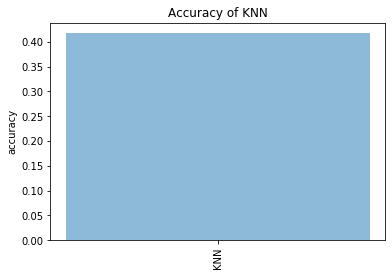

In [168]:
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)